참고문헌

- 파이썬 딥러닝 파이토치 (이경택, 방심수, 안상준 지음), 정보문화사

- https://gaussian37.github.io/dl-pytorch-snippets/

- 2023 KAIA 한국인공지능학회 / Introduction to pytorch (Hyunchul Kim) / 링크 : https://www.youtube.com/watch?v=YX-AgT-Kovg

- PyTorch로 시작하는 딥 러닝 입문 (유원준, 안상준 지음), 링크 : https://wikidocs.net/book/2788

# Long Short-Term Memory (LSTM)

- 앞서 배운 RNN을 가장 단순한 형태의 RNN이라고 하여 바닐라 RNN(Vanilla RNN)이라고 합니다.
- 바닐라 RNN 이후 바닐라 RNN의 한계를 극복하기 위한 다양한 RNN의 변형이 나왔습니다.
- 이번 챕터에서 배우게 될 LSTM도 그 중 하나입니다.
- 앞으로의 설명에서 LSTM과 비교하여 RNN을 언급하는 것은 전부 바닐라 RNN을 말합니다.

## 1. 바닐라 RNN의 한계

**장기 의존성 문제(the problem of Long-Term Dependencies)** : 바닐라 RNN의 시점(time step)이 길어질 수록 앞의 정보가 뒤로 충분히 전달되지 못하는 현상

- 앞 챕터에서 바닐라 RNN은 출력 결과가 이전의 계산 결과에 의존한다는 것을 언급한 바 있습니다.
- 하지만, 바닐라 RNN은 비교적 짧은 시퀀스(sequence)에 대해서만 효과를 보이는 단점이 있습니다.
- 바닐라 RNN의 시점(time step)이 길어질 수록 앞의 정보가 뒤로 충분히 전달되지 못하는 현상이 발생합니다.

<img src='https://drive.google.com/uc?export=download&id=1DnV0eZkq0JzvJA4uAba8zdbrprCW-dlm' width="450" height ="300" /><br>

- 위의 그림은 첫번째 입력값인 $x_1$의 정보량을 짙은 남색으로 표현했을 때, 색이 점차 얕아지는 것으로 시점이 지날수록 $x_1$의 정보량이 손실되어가는 과정을 표현하였습니다. - 뒤로 갈수록 $x_1$의 정보량은 손실되고, 시점이 충분히 긴 상황에서는 $x_1$의 전체 정보에 대한 영향력은 거의 의미가 없을 수도 있습니다.

- 어쩌면 가장 중요한 정보가 시점의 앞 쪽에 위치할 수도 있습니다. RNN으로 만든 언어 모델이 다음 단어를 예측하는 과정을 생각해봅시다.
  + 예를 들어 "모스크바에 여행을 왔는데 건물도 예쁘고 먹을 것도 맛있었어. 그런데 글쎄 직장 상사한테 전화가 왔어. 어디냐고 묻더라구 그래서 나는 말했지. 저 여행왔는데요. 여기 ___"
  + 다음 단어를 예측하기 위해서는 장소 정보가 필요합니다. 그런데 장소 정보에 해당되는 단어인 '모스크바'는 앞에 위치하고 있고, RNN이 충분한 기억력을 가지고 있지 못한다면 다음 단어를 엉뚱하게 예측합니다.


## 2. 바닐라 RNN 내부 열어보기

<img src='https://drive.google.com/uc?export=download&id=1B1LbBnnT2ph-OIxZ9waovlIOKFI871cc' width="400" height ="350" /><br>

- 위의 그림은 바닐라 RNN의 내부 구조를 보여줍니다.
  + 이 책에서는 RNN 계열의 인공 신경망의 그림에서는 편향 $b$를 생략합니다.
  + 위의 그림에 편향 $b$를 그린다면 옆에 tanh로 향하는 또 하나의 입력선을 그리면 됩니다.

$$ h_t = tanh(W_x x_t + W_h h_{t-1} + b) $$

- 바닐라 RNN은 $x_t$와 $h_{t-1}$ 이라는 두 개의 입력이 각각의 가중치와 곱해져서 메모리 셀의 입력이 됩니다.
- 그리고 이를 하이퍼볼릭탄젠트 함수의 입력으로 사용하고 이 값은 은닉층의 출력인 은닉 상태가 됩니다.

## 3. LSTM(Long Short-Term Memory)

<img src='https://drive.google.com/uc?export=download&id=1Wtx_vmDN725UxCVYvcu9TZs5TwhxAT2Q' width="400" height ="" /><br>

- 위의 그림은 LSTM의 전체적인 내부의 모습을 보여줍니다.
- 전통적인 RNN의 이러한 단점을 보완한 RNN의 일종을 장단기 메모리(Long Short-Term Memory)라고 하며, 줄여서 LSTM이라고 합니다.
- LSTM은 은닉층의 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트를 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정합니다.
- 요약하면 LSTM은 은닉 상태(hidden state)를 계산하는 식이 전통적인 RNN보다 조금 더 복잡해졌으며 셀 상태(cell state)라는 값을 추가하였습니다.
- 위의 그림에서는 $t$시점의 셀 상태를 $C_t$로 표현하고 있습니다.
- LSTM은 RNN과 비교하여 긴 시퀀스의 입력을 처리하는데 탁월한 성능을 보입니다.

<img src='https://drive.google.com/uc?export=download&id=1C3mBOeeq4E0u_EhU1N0RptDK_nZzjRLG' width="400" height ="" /><br>

- 셀 상태는 위의 그림에서 왼쪽에서 오른쪽으로 가는 굵은 선입니다.
- 셀 상태 또한 이전에 배운 은닉 상태처럼 이전 시점의 셀 상태가 다음 시점의 셀 상태를 구하기 위한 입력으로서 사용됩니다.

<br>

- 은닉 상태값과 셀 상태값을 구하기 위해서 새로 추가 된 3개의 게이트를 사용합니다.
- 각 게이트는 삭제 게이트, 입력 게이트, 출력 게이트라고 부르며 이 3개의 게이트에는 공통적으로 시그모이드 함수가 존재합니다.
- 시그모이드 함수를 지나면 0과 1사이의 값이 나오게 되는데 이 값들을 가지고 게이트를 조절합니다.
  + 이하 식에서 $\sigma$는 시그모이드 함수를 의미합니다.
  + 이하 식에서 tanh는 하이퍼볼릭탄젠트 함수를 의미합니다.
  + $W_{xi}$, $W_{xg}$, $W_{xf}$, $W_{xo}$는 $x_t$와 함께 각 게이트에서 사용되는 4개의 가중치입니다.
  + $W_{hi}$, $W_{hg}$, $W_{hf}$, $W_{ho}$는 $h_{t-1}$와 함께 각 게이트에서 사용되는 4개의 가중치입니다.
  + $b_i$, $b_g$, $b_f$, $b_o$는 각 게이트에서 사용되는 4개의 편향입니다.

### 3-1) 입력 게이트

<img src='https://drive.google.com/uc?export=download&id=1KvcBhvA7NJUIDjyOj2yat-6jjzky76A6' width="300" height ="" /><br>

- 입력 게이트는 현재 정보를 기억하기 위한 게이트입니다.
- 우선 현재 시점 $t$의 $x$값과 입력 게이트로 이어지는 가중치 $W_{xi}$를 곱한 값과 이전 시점 $t-1$의 은닉 상태가 입력 게이트로 이어지는 가중치 $W_{hi}$를 곱한 값을 더하여 시그모이드 함수를 지납니다. 이를 $i_t$라고 합니다.

<br>

- 그리고 현재 시점 $t$의 $x$값과 입력 게이트로 이어지는 가중치 $W_{xg}$를 곱한 값과 이전 시점 $t-1$의 은닉 상태가 입력 게이트로 이어지는 가중치 $W_{hg}$를 곱한 값을 더하여 하이퍼볼릭탄젠트 함수를 지납니다. 이를 $g_t$ 라고 합니다.

<br>

- 시그모이드 함수를 지나 0과 1 사이의 값과 하이퍼볼릭탄젠트 함수를 지나 -1과 1사이의 값 두 개가 나오게 됩니다.
- 이 두 개의 값을 가지고 이번에 선택된 기억할 정보의 양을 정하는데, 구체적으로 어떻게 결정하는지는 아래에서 배우게 될 셀 상태 수식을 보면 됩니다.

### 3-2) 삭제 게이트

<img src='https://drive.google.com/uc?export=download&id=1r0bamSfDJMLKnWKMZOdgGdhXlmeV5cEk' width="300" height ="" /><br>

- 삭제 게이트는 기억을 삭제하기 위한 게이트입니다.
- 재 시점 $t$의 $x$값과 이전 시점 $t-1$의 은닉 상태가 시그모이드 함수를 지나게 됩니다.
- 시그모이드 함수를 지나면 0과 1 사이의 값이 나오게 되는데, 이 값이 곧 삭제 과정을 거친 정보의 양입니다.
- 0에 가까울수록 정보가 많이 삭제된 것이고 1에 가까울수록 정보를 온전히 기억한 것입니다.
- 이를 가지고 셀 상태를 구하게 되는데, 구체적으로는 아래의 셀 상태 수식을 보면 됩니다.

### 3-3) 셀 상태(장기 상태)

<img src='https://drive.google.com/uc?export=download&id=1laT_UdP5WHd_dzhDus4gu7q_eXRFwSmw' width="300" height ="" /><br>

- 셀 상태 $C_t$를 LSTM에서는 장기 상태라고 부르기도 합니다. 삭제 게이트에서 일부 기억을 잃은 상태입니다.

<br>

- 입력 게이트에서 구한 $i_t$, $g_t$ 이 두 개의 값에 대해서 원소별 곱(entrywise product)을 진행합니다. 이것이 이번에 선택된 **기억할 값**입니다.
- 입력 게이트에서 선택된 기억을 삭제 게이트의 결과값과 더합니다. 이 값을 현재 시점 $t$의 셀 상태라고 하며, 이 값은 다음 $t+1$ 시점의 LSTM 셀로 넘겨집니다.

<br>

- 삭제 게이트와 입력 게이트의 영향력을 이해해봅시다.
  + 만약 삭제 게이트의 출력값인 $f_t$가 0이 된다면, 이전 시점의 셀 상태값인 $C_{t-1}$은 현재 시점의 셀 상태값을 결정하기 위한 영향력이 0이 되면서, 오직 입력 게이트의 결과만이 현재 시점의 셀 상태값 $C_t$ 을 결정할 수 있습니다. 이는 삭제 게이트가 완전히 닫히고 입력 게이트를 연 상태를 의미합니다.
  + 반대로 입력 게이트의 $i_t$값을 0이라고 한다면, 현재 시점의 셀 상태값 $C_t$는 오직 이전 시점의 셀 상태값 $C_{t-1}$의 값에만 의존합니다. 이는 입력 게이트를 완전히 닫고 삭제 게이트만을 연 상태를 의미합니다.
  + 결과적으로 삭제 게이트는 이전 시점의 입력을 얼마나 반영할지를 의미하고, 입력 게이트는 현재 시점의 입력을 얼마나 반영할지를 결정합니다.

### 3-4) 출력 게이트와 은닉 상태(단기 상태)

<img src='https://drive.google.com/uc?export=download&id=1hPOMBfO5EVXeHHgNmN9PzcdRFEHRqyfU' width="300" height ="" /><br>

- 출력 게이트는 현재 시점 $t$의 $x$값과 이전 시점 $t-1$의 은닉 상태가 시그모이드 함수를 지난 값입니다.
  + 해당 값은 현재 시점 t의 은닉 상태를 결정하는 일에 쓰이게 됩니다.

- 은닉 상태를 단기 상태라고 하기도 합니다. 은닉 상태는 장기 상태의 값이 하이퍼볼릭탄젠트 함수를 지나 -1과 1사이의 값입니다.
  + 해당 값은 출력 게이트의 값과 연산되면서, 값이 걸러지는 효과가 발생합니다.
  + 단기 상태의 값은 또한 출력층으로도 향합니다.

## 4. 파이토치의 `nn.LSTM()`

- 기존에 RNN 셀을 사용하려고 했을 때는 다음과 같이 사용했었습니다.

In [ ]:
nn.RNN(input_dim, hidden_size, batch_fisrt=True)

- LSTM 셀은 이와 유사하게 다음과 같이 사용합니다.

In [ ]:
nn.LSTM(input_dim, hidden_size, batch_fisrt=True)

### Example

밑의 코드는 간단한 시계열 자료에 대해서 이를 LSTM 모형을 이용하고 학습하여 테스트해보는 내용을 담고 있다.

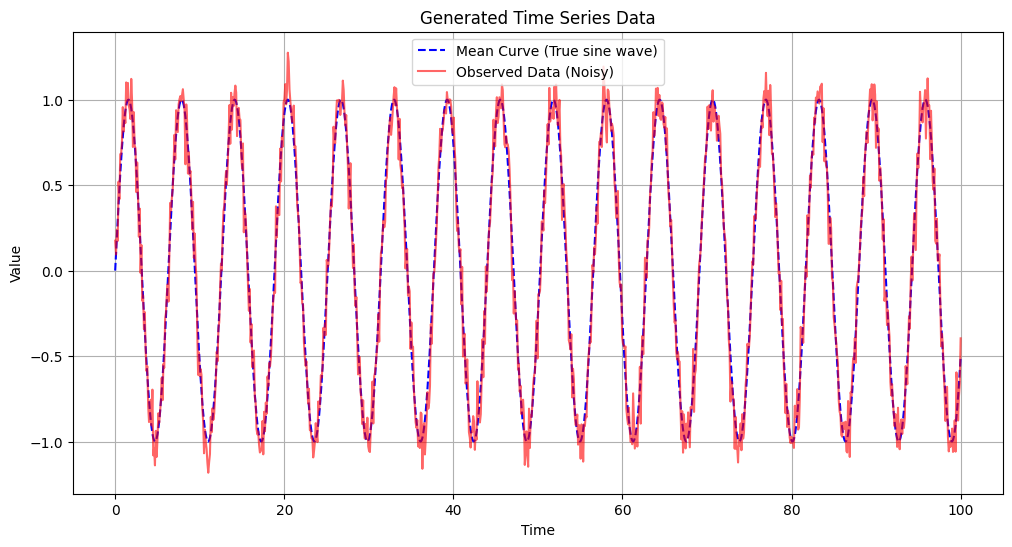

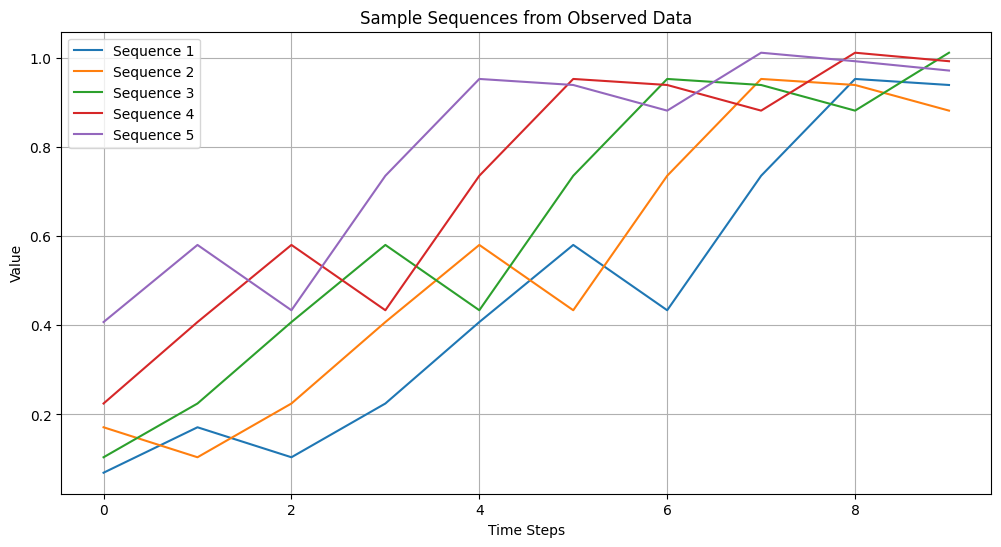

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성 (x는 mean curve, y는 관측된 시계열 데이터)
def generate_data(seq_length, total_samples):
    """
    데이터 생성 함수.
    x: Mean curve (사인파)
    y: 관측된 데이터 (사인파 + 노이즈)
    """
    x = np.linspace(0, 100, total_samples)  # Mean curve
    y = np.sin(x) + 0.1 * np.random.normal(size=x.shape)  # 관측 데이터 (노이즈 포함)
    sequences = [y[i:i+seq_length] for i in range(total_samples - seq_length)]  # 입력 시퀀스
    labels = [y[i+seq_length] for i in range(total_samples - seq_length)]  # 예측할 값
    return np.array(sequences), np.array(labels)

# 하이퍼파라미터 설정
seq_length = 10        # 각 입력 시퀀스의 길이
total_samples = 1000   # 전체 데이터 포인트 개수
hidden_size = 50       # LSTM의 hidden state 크기
num_epochs = 50        # 학습 반복 횟수
learning_rate = 0.01   # 학습률

# 데이터 준비
data, labels = generate_data(seq_length, total_samples)
train_size = int(len(data) * 0.8)  # 80%를 학습 데이터로 사용

# 학습 데이터와 테스트 데이터로 분리
x_train = torch.tensor(data[:train_size], dtype=torch.float32)  # 학습 입력 시퀀스
y_train = torch.tensor(labels[:train_size], dtype=torch.float32).view(-1, 1)  # 학습 레이블
x_test = torch.tensor(data[train_size:], dtype=torch.float32)   # 테스트 입력 시퀀스
y_test = torch.tensor(labels[train_size:], dtype=torch.float32).view(-1, 1)   # 테스트 레이블

# 데이터 시각화: Mean curve (x)와 관측 데이터 (y)
x = np.linspace(0, 100, total_samples)  # Mean curve
y = np.sin(x) + 0.1 * np.random.normal(size=x.shape)  # 관측 데이터 (노이즈 포함)

# 전체 시계열 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(x, np.sin(x), label='Mean Curve (True sine wave)', color='blue', linestyle='--')
plt.plot(x, y, label='Observed Data (Noisy)', color='red', alpha=0.6)
plt.legend()
plt.title("Generated Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid()
plt.show()

# 학습 데이터의 일부 시각화 (seq_length만큼의 시퀀스)
plt.figure(figsize=(12, 6))
for i in range(5):  # 5개의 시퀀스 샘플을 시각화
    plt.plot(range(seq_length), data[i], label=f"Sequence {i+1}")
plt.title("Sample Sequences from Observed Data")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

In [5]:
x_train.shape # 792 x 10 -> 792 x 10 x 1

torch.Size([792, 10])

Epoch [10/50], Loss: 0.0869
Epoch [20/50], Loss: 0.0312
Epoch [30/50], Loss: 0.0170
Epoch [40/50], Loss: 0.0180
Epoch [50/50], Loss: 0.0169
Test Loss: 0.0170


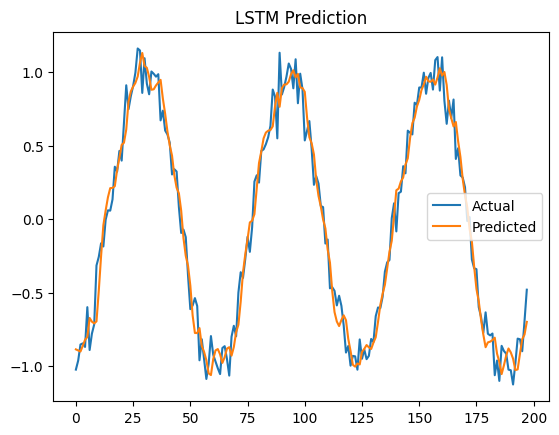

In [6]:
# LSTM 모델 정의
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
        LSTM 모델 초기화
        :param input_size: 입력 데이터의 크기 (특징 수)
        :param hidden_size: LSTM의 hidden state 크기
        :param output_size: 출력 데이터의 크기
        """
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)  # LSTM 레이어 정의
        self.fc = nn.Linear(hidden_size, output_size)  # Fully Connected Layer

    def forward(self, x):
        """
        모델의 순전파 연산 정의
        :param x: 입력 데이터
        :return: 모델 출력
        """
        out, _ = self.lstm(x)  # LSTM 순전파 수행 (hidden state와 cell state 자동 초기화)
        out = self.fc(out[:, -1, :])  # 마지막 타임스텝의 출력만 활용
        return out

# 모델 생성
model = LSTM(input_size=1, hidden_size=hidden_size, output_size=1)
criterion = nn.MSELoss()  # 손실 함수 (평균 제곱 오차)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # 옵티마이저 정의

# 입력 데이터 차원 변경 (PyTorch는 [배치 크기, 시퀀스 길이, 입력 크기] 형식 필요)
x_train = x_train.unsqueeze(2)  # [배치 크기, 시퀀스 길이, 입력 크기]
x_test = x_test.unsqueeze(2)

# 학습 루프
for epoch in range(num_epochs):
    model.train()  # 모델을 학습 모드로 설정
    outputs = model(x_train)  # 모델 출력
    loss = criterion(outputs, y_train)  # 손실 계산
    optimizer.zero_grad()  # 이전 그래디언트 초기화
    loss.backward()  # 그래디언트 계산
    optimizer.step()  # 모델 매개변수 업데이트

    if (epoch + 1) % 10 == 0:  # 10 에포크마다 손실 출력
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# 테스트
model.eval()  # 모델을 평가 모드로 설정
with torch.no_grad():  # 그래디언트 계산 비활성화
    predictions = model(x_test)  # 테스트 데이터로 예측
    test_loss = criterion(predictions, y_test)  # 테스트 손실 계산
    print(f"Test Loss: {test_loss.item():.4f}")

# 결과 시각화
plt.plot(y_test.numpy(), label='Actual')  # 실제 값
plt.plot(predictions.numpy(), label='Predicted')  # 예측 값
plt.legend()
plt.title("LSTM Prediction")
plt.show()


#### >>>> (실습) LSTM을 활용하여 주가데이터 분석하기

이 과제에서는 실제 주식 데이터를 활용하여 LSTM(Long Short-Term Memory) 모델을 설계하고, 주식의 미래 종가를 예측하는 실습을 진행합니다. 주식 데이터는 yfinance 라이브러리를 사용해 가져오며, 이를 전처리하고 모델을 학습시켜 결과를 분석합니다.

- LSTM 모델 설계
  + 입력 크기 : 1
  + hidden state 크기 : 50
  + 출력 크기 : 1
  + 입력 시퀀스 길이 : 30
  + epoch : 1000
  + learning rate : 0.001

- 결과 시각화 : 실제 주식 가격과 모델이 예측한 주식 가격을 비교하여 그래프로 시각화하세요. 그래프에는 다음 두 가지를 포함해야 합니다:
  + 실제 주식 가격 (Actual Price)
  + 예측 주식 가격 (Predicted Price)

In [7]:
import yfinance as yf
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 데이터 다운로드
def fetch_stock_data(ticker, start, end):
    """
    yfinance 라이브러리를 사용해 주식 데이터를 다운로드합니다.
    :param ticker: 주식 티커 (예: 'AAPL' for Apple)
    :param start: 데이터 시작 날짜 (예: '2020-01-01')
    :param end: 데이터 종료 날짜 (예: '2023-01-01')
    :return: 종가 데이터
    """
    stock_data = yf.download(ticker, start=start, end=end)
    return stock_data['Close'].values  # 종가 데이터만 반환

# 데이터 전처리
def prepare_data(data, seq_length):
    """
    데이터를 LSTM 입력 형식으로 전처리합니다.
    :param data: 원본 데이터 (1차원 배열)
    :param seq_length: 입력 시퀀스 길이
    :return: LSTM 입력 데이터와 레이블
    """
    sequences = [data[i:i + seq_length] for i in range(len(data) - seq_length)]
    labels = [data[i + seq_length] for i in range(len(data) - seq_length)]
    return np.array(sequences), np.array(labels)

# 주식 데이터 가져오기
ticker = 'TSLA'  # 예: 애플 주식
start_date = '2022-01-01'
end_date = '2024-12-01'
raw_data = fetch_stock_data(ticker, start=start_date, end=end_date)

# 데이터 스케일링 (MinMaxScaler를 사용해 0과 1 사이로 변환)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(raw_data.reshape(-1, 1)).flatten()

# 하이퍼파라미터
seq_length = 30  # 입력 시퀀스 길이 (30일 데이터로 예측)
hidden_size = 50
num_epochs = 1000
learning_rate = 0.001

# 데이터 전처리
data, labels = prepare_data(scaled_data, seq_length)
train_size = int(len(data) * 0.8)  # 80% 데이터를 학습용으로 사용

# 학습 데이터와 테스트 데이터 분리
x_train = torch.tensor(data[:train_size], dtype=torch.float32)
y_train = torch.tensor(labels[:train_size], dtype=torch.float32).view(-1, 1)
x_test = torch.tensor(data[train_size:], dtype=torch.float32)
y_test = torch.tensor(labels[train_size:], dtype=torch.float32).view(-1, 1)

# 입력 데이터 차원 변경
x_train = x_train.unsqueeze(2)  # [배치 크기, 시퀀스 길이, 입력 차원]
x_test = x_test.unsqueeze(2)

[*********************100%***********************]  1 of 1 completed


Epoch [10/1000], Loss: 0.0432
Epoch [20/1000], Loss: 0.0299
Epoch [30/1000], Loss: 0.0260
Epoch [40/1000], Loss: 0.0227
Epoch [50/1000], Loss: 0.0172
Epoch [60/1000], Loss: 0.0087
Epoch [70/1000], Loss: 0.0073
Epoch [80/1000], Loss: 0.0058
Epoch [90/1000], Loss: 0.0047
Epoch [100/1000], Loss: 0.0041
Epoch [110/1000], Loss: 0.0037
Epoch [120/1000], Loss: 0.0033
Epoch [130/1000], Loss: 0.0030
Epoch [140/1000], Loss: 0.0027
Epoch [150/1000], Loss: 0.0025
Epoch [160/1000], Loss: 0.0024
Epoch [170/1000], Loss: 0.0023
Epoch [180/1000], Loss: 0.0022
Epoch [190/1000], Loss: 0.0022
Epoch [200/1000], Loss: 0.0021
Epoch [210/1000], Loss: 0.0020
Epoch [220/1000], Loss: 0.0020
Epoch [230/1000], Loss: 0.0019
Epoch [240/1000], Loss: 0.0019
Epoch [250/1000], Loss: 0.0019
Epoch [260/1000], Loss: 0.0018
Epoch [270/1000], Loss: 0.0018
Epoch [280/1000], Loss: 0.0018
Epoch [290/1000], Loss: 0.0017
Epoch [300/1000], Loss: 0.0017
Epoch [310/1000], Loss: 0.0017
Epoch [320/1000], Loss: 0.0016
Epoch [330/1000],

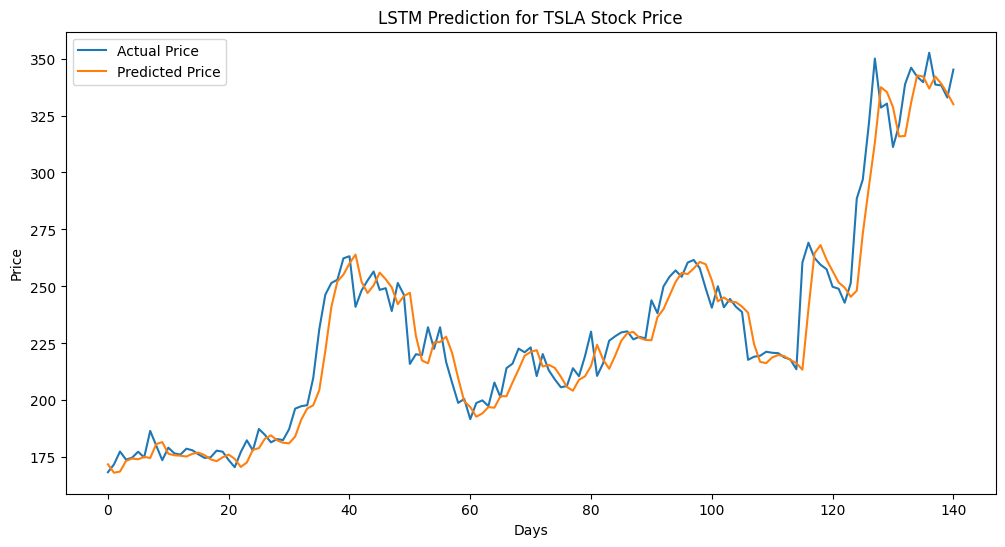

In [ ]:
# ------------------------------------------------------------------------------------------------------------------------
# LSTM 모델 정의
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)  # LSTM 순전파 수행 (hidden state와 cell state 자동 초기화)
        out = self.fc(out[:, -1, :])  # 마지막 타임스텝의 출력만 활용
        return out

# 모델 생성
model = LSTM(input_size=1, hidden_size=hidden_size, output_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 학습 루프
for epoch in range(num_epochs):
    model.train()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# 테스트
model.eval()
with torch.no_grad():
    predictions = model(x_test)
    test_loss = criterion(predictions, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

# 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test.numpy()), label='Actual Price')
plt.plot(scaler.inverse_transform(predictions.numpy()), label='Predicted Price')
plt.legend()
plt.title(f"LSTM Prediction for {ticker} Stock Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()
# ------------------------------------------------------------------------------------------------------------------------